<a href="https://colab.research.google.com/github/DineshDeepanshu2002/Fake-News-Detection-using-MachineLearning-main/blob/main/hr_logical_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path="/content/drive/MyDrive/Copy of HR_comma_sep.csv"
df=pd.read_csv(path)
random_sample = df.sample(n=5)

print(random_sample)

       satisfaction_level  last_evaluation  number_project  \
12746                0.36             0.50               2   
7931                 0.42             0.48               5   
444                  0.39             0.54               2   
3278                 0.78             0.98               4   
1058                 0.31             0.95               6   

       average_montly_hours  time_spend_company  Work_accident  left  \
12746                   132                   3              0     1   
7931                    191                   5              0     0   
444                     127                   3              0     1   
3278                    239                   3              0     0   
1058                    235                   5              0     1   

       promotion_last_5years   Department  salary  
12746                      0   management     low  
7931                       0        RandD  medium  
444                        0          

In [ ]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


# New Section

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


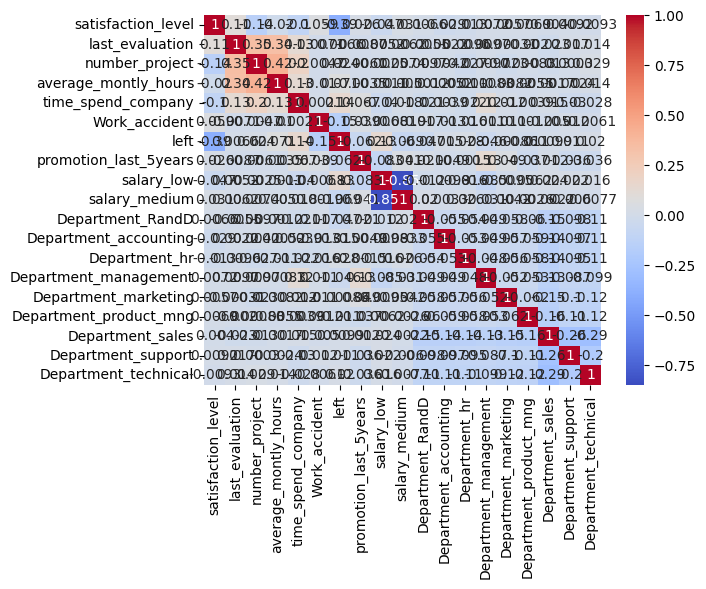

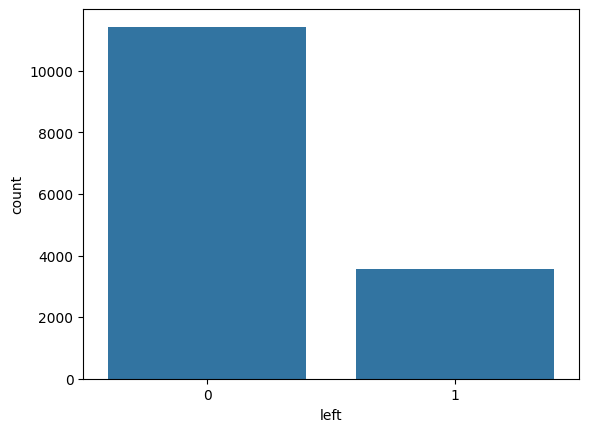

In [ ]:
# Correlation matrix to see relationships between numerical variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check the distribution of the target variable 'left'
sns.countplot(x='left', data=df)
plt.show()

In [ ]:
print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


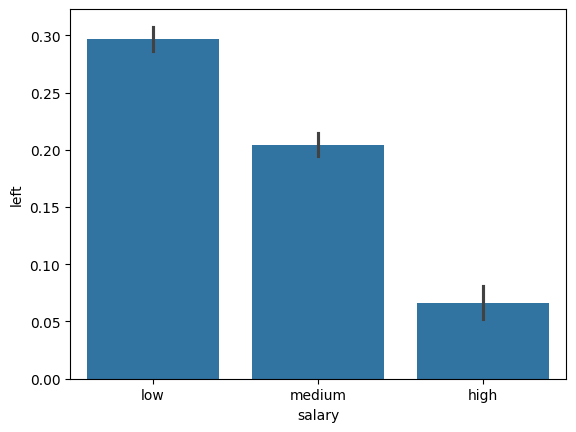

In [ ]:
# Bar plot for salary vs retention
sns.barplot(x='salary', y='left', data=df)
plt.show()

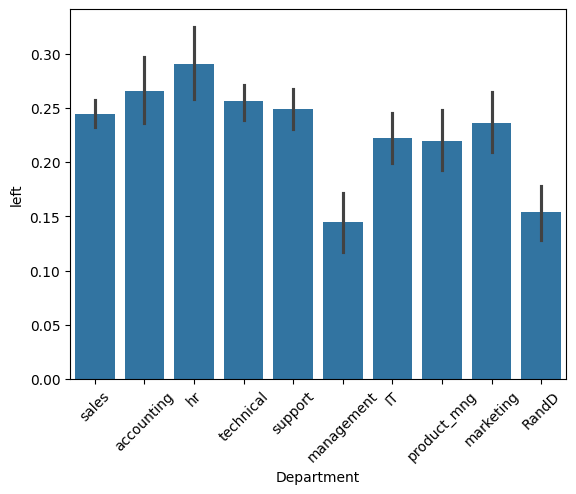

In [ ]:
# Bar plot for department vs retention
sns.barplot(x='Department', y='left', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Convert categorical variables
df = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,True,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,True,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,True,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,True,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Define features (X) and target (y)
X = df.drop('left', axis=1)
y = df['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1720
           1       0.55      0.32      0.41       530

    accuracy                           0.78      2250
   macro avg       0.68      0.62      0.64      2250
weighted avg       0.75      0.78      0.76      2250

Confusion Matrix:
[[1580  140]
 [ 359  171]]
